# Convolutional Neural Networks: Architecture Analysis



## 1. Dataset Exploration (EDA)

### 1.1 Dataset Selection and Justification

**Fashion-MNIST** is a dataset of Zalando's article images, comprising 60,000 training and 10,000 test examples. Each example is a $28 \times 28$ grayscale image associated with a label from 10 classes.

**Why Fashion-MNIST?**

- **Increased Complexity:** Unlike simple handwritten digits, Fashion-MNIST contains **intricate patterns** in clothing items (e.g., texture variations in shirts, different types of footwear, subtle differences between pullovers and coats). This makes it a more challenging benchmark for convolutional neural networks (CNNs).

- **Real-World Relevance:** Fashion-MNIST represents a more realistic computer vision problem, where features are distributed across the image 

### 1.2 Data Loading

We use **TensorFlow/Keras** to load the Fashion-MNIST dataset directly. This approach ensures reproducibility and eliminates the need for manual downloads.

In [3]:
%pip install tensorflow numpy matplotlib


  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached numpy-2.4.2-cp313-cp313-win_amd64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached absl_py-2.4.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.5-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached wrapt-2.1.1-cp313-cp313-win_amd64.whl.metadata (7.6 kB)
 

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

def load_fashion_mnist():
    """
    Load Fashion-MNIST dataset from Keras.
    
    Returns:
        tuple: (x_train, y_train), (x_test, y_test)
            x_train: Training images (60000, 28, 28)
            y_train: Training labels (60000,)
            x_test: Test images (10000, 28, 28)
            y_test: Test labels (10000,)
    """
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    return (x_train, y_train), (x_test, y_test)

# Load data
(x_train, y_train), (x_test, y_test) = load_fashion_mnist()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### 1.3 Dataset Structure and Dimensions


In [3]:
print("DATASET STRUCTURE")

print(f"Training set shape:   {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape:       {x_test.shape}")
print(f"Test labels shape:    {y_test.shape}")
print()
print(f"Data type:            {x_train.dtype}")
print(f"Pixel value range:    [{x_train.min()}, {x_train.max()}]")
print(f"Number of classes:    {len(np.unique(y_train))}")


DATASET STRUCTURE
Training set shape:   (60000, 28, 28)
Training labels shape: (60000,)
Test set shape:       (10000, 28, 28)
Test labels shape:    (10000,)

Data type:            uint8
Pixel value range:    [0, 255]
Number of classes:    10


**Interpretation:**
- **60,000 training samples** and **10,000 test samples** provide sufficient data for training and evaluation.
- Each image is **28×28 pixels**, grayscale (single channel).
- Pixel values range from **0 (black) to 255 (white)**, requiring normalization before training.

### 1.4 Class Distribution

An **unbalanced dataset** can lead to biased models. We verify that all classes are **equally represented**.

In [4]:
# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Count samples per class
def analyze_class_distribution(labels, class_names):
    """
    Analyze and visualize class distribution.
    
    Args:
        labels: Array of class labels
        class_names: List of class name strings
        
    Returns:
        dict: Class distribution counts
    """
    unique, counts = np.unique(labels, return_counts=True)
    distribution = dict(zip(unique, counts))
    
    print("\nCLASS DISTRIBUTION (Training Set)")
    print("-" * 40)
    for class_id, count in distribution.items():
        print(f"{class_id}: {class_names[class_id]:<15} → {count:>5} samples")
    print("-" * 40)
    
    return distribution

distribution = analyze_class_distribution(y_train, class_names)


CLASS DISTRIBUTION (Training Set)
----------------------------------------
0: T-shirt/top     →  6000 samples
1: Trouser         →  6000 samples
2: Pullover        →  6000 samples
3: Dress           →  6000 samples
4: Coat            →  6000 samples
5: Sandal          →  6000 samples
6: Shirt           →  6000 samples
7: Sneaker         →  6000 samples
8: Bag             →  6000 samples
9: Ankle boot      →  6000 samples
----------------------------------------


**Visualization:**

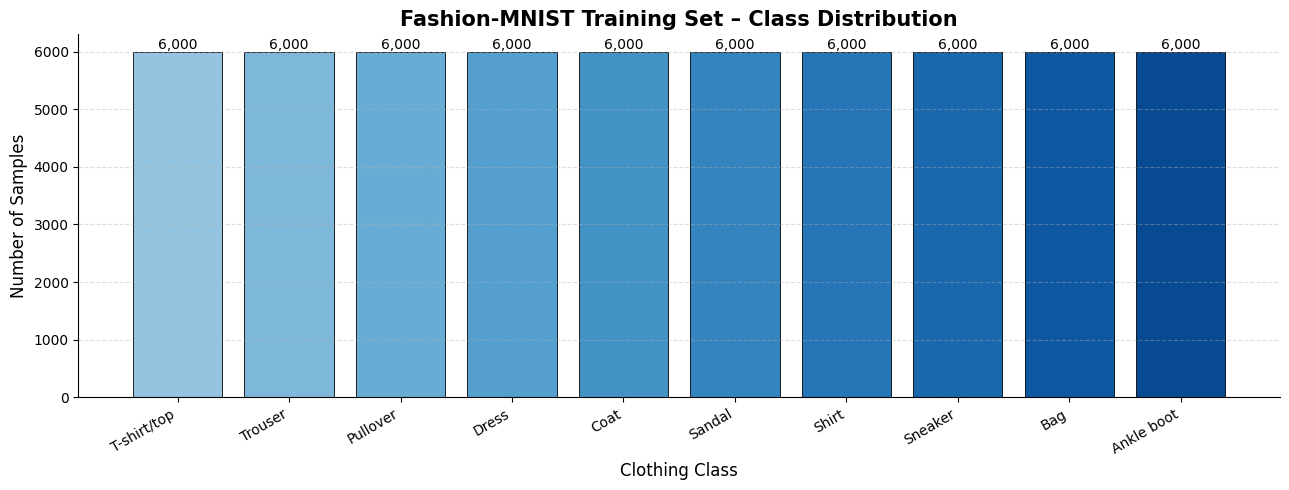

In [ ]:
plt.figure(figsize=(13, 5))

classes = list(distribution.keys())
counts = list(distribution.values())
labels = [class_names[i] for i in classes]

colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(classes)))

bars = plt.bar(labels, counts, color=colors, edgecolor='black', linewidth=0.6)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xlabel('Clothing Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title(
    'Fashion-MNIST Training Set – Class Distribution',
    fontsize=15,
    fontweight='bold'
)

plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


**Interpretation:**
- All classes should have **exactly 6,000 samples** in the training set (balanced distribution).
- This ensures the model will not be biased toward any particular class during training.

### 1.5 Sample Visualization

**Visual inspection** helps us understand the complexity and diversity of the dataset.

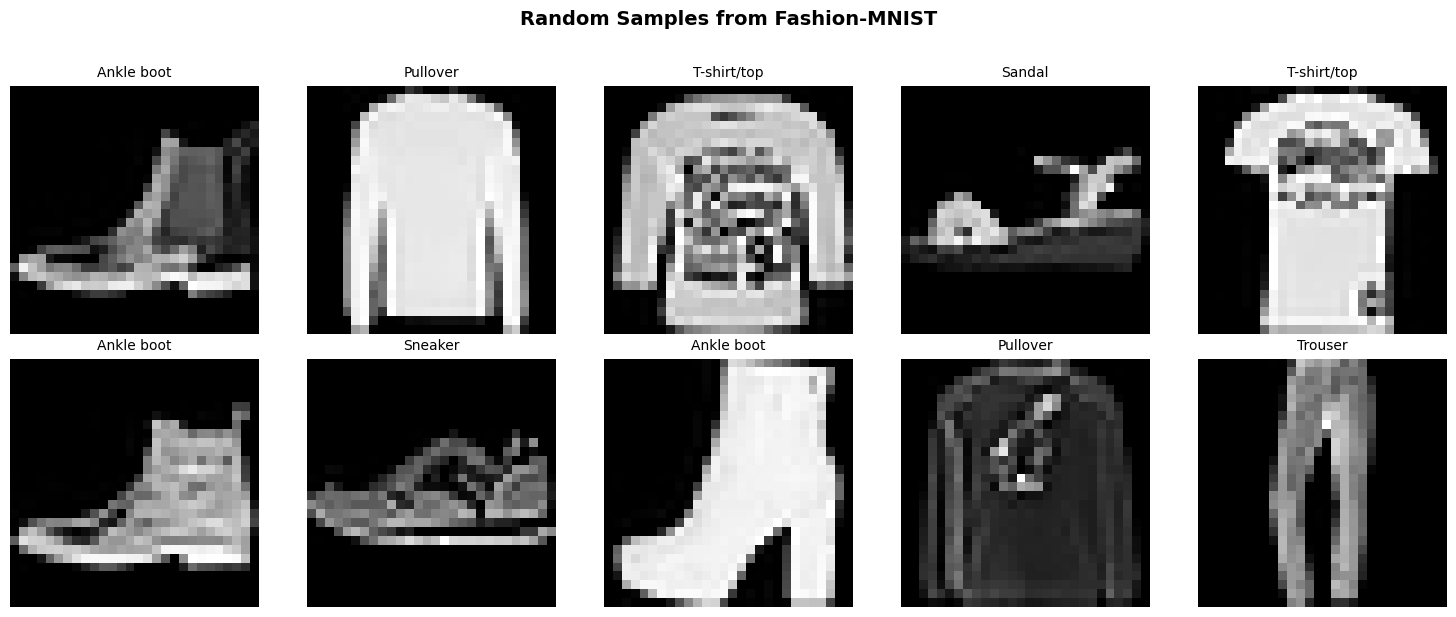

In [7]:
def visualize_samples(x_data, y_data, class_names, num_samples=10):
    """
    Display random samples from the dataset.
    
    Args:
        x_data: Image data array
        y_data: Label data array
        class_names: List of class names
        num_samples: Number of samples to display
    """
    fig, axes = plt.subplots(2, num_samples // 2, figsize=(15, 6))
    axes = axes.flatten()
    

    indices = np.random.choice(len(x_data), num_samples, replace=False)
    
    for i, idx in enumerate(indices):
        ax = axes[i]
        ax.imshow(x_data[idx], cmap='gray')
        ax.set_title(f"{class_names[y_data[idx]]}", fontsize=10)
        ax.axis('off')
    
    plt.suptitle('Random Samples from Fashion-MNIST', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

visualize_samples(x_train, y_train, class_names, num_samples=10)

**Key Observations:**
- **Intra-class variation:** Even within the same class (e.g., "Sneaker"), there are different styles, angles, and patterns.
- **Inter-class similarity:** Some classes may look similar at low resolution (e.g., "Pullover" vs "Coat"), making classification more challenging than MNIST digits.

### 1.6 Preprocessing Requirements

Before training any neural network, we must **normalize** the pixel values to the range [0, 1].

**Why Normalize?**
- Neural networks train more efficiently when inputs are **small and standardized**.
- Gradient descent converges faster with normalized data.

In [8]:
def preprocess_data(x_train, x_test):
    """
    Normalize pixel values to [0, 1] range.
    
    Args:
        x_train: Training images
        x_test: Test images
        
    Returns:
        tuple: Normalized (x_train, x_test)
    """
    x_train_norm = x_train.astype('float32') / 255.0
    x_test_norm = x_test.astype('float32') / 255.0
    
    print(f"Normalized pixel range: [{x_train_norm.min():.2f}, {x_train_norm.max():.2f}]")
    
    return x_train_norm, x_test_norm

x_train_norm, x_test_norm = preprocess_data(x_train, x_test)

Normalized pixel range: [0.00, 1.00]


### 1.7 Summary of Dataset Characteristics

| **Property**          | **Value**                     |
|-----------------------|-------------------------------|
| Training samples      | 60,000                        |
| Test samples          | 10,000                        |
| Image dimensions      | 28 × 28 pixels                |
| Channels              | 1 (grayscale)                 |
| Number of classes     | 10                            |
| Class distribution    | Balanced (6,000 per class)    |
| Pixel value range     | 0–255 (uint8) → [0, 1] after normalization |


---

## 2. Baseline Model (Non-Convolutional)

### 2.1 Purpose and Scope
The implementation of a Baseline Model using a Multi-Layer Perceptron (MLP) architecture serves as the technical foundation for this experiment. Its primary objective is to establish a performance floor, allowing for an objective evaluation of the dataset's behavior before introducing the architectural complexity of Convolutional Neural Networks (CNNs).

#### *Analytical Justification*
The development of this initial model addresses three critical analytical needs:

* **Quantifying Added Value:** By measuring the performance of a simple structure, I can determine the exact "gain" in efficiency when migrating to a CNN. This baseline acts as a benchmark to justify architectural changes.
* **Impact of Dimensionality Loss:** This model highlights the limitations of flatteningimages. By converting a $28 \times 28$ matrix into a 784-dimensional vector, the system is forced to treat pixels as independent variables, deliberately ignoring the spatial hierarchy (edges and textures) essential for garment recognition in the Fashion-MNIST dataset.
* **Operational Efficiency Evaluation:** Establishing base metrics for loss, accuracy, and training time allows for a cost-benefit analysis regarding the computational load of more advanced models versus their increase in precision.



#### *Architecture Selection*
For this baseline, I have designed a feedforward neural network structured as follows:

1. **Flattening Layer:** Transforms the 2D input into a linear vector for dense processing.
2. **Dense Layers (Fully Connected):** Standard hidden layers utilizing ReLU activation functions to model non-linear relationships.
3. **Output Layer:** 10 neurons with **Softmax** activation, yielding a probability distribution for the 10 fashion categories.

---


### 2.2 Preparing the Data

Before building the model, we need to ensure our data is in the correct format and properly normalized.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Data Preparation Complete")
print(f"Training samples: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")
print(f"Image shape: {x_train.shape[1:]} (will be flattened to {28*28})")
print(f"Labels encoded: {y_train_cat.shape}")

Data Preparation Complete
Training samples: 60000
Test samples: 10000
Image shape: (28, 28) (will be flattened to 784)
Labels encoded: (60000, 10)


**Rationale:**

- **Normalization:** Ensures gradient descent converges faster and avoids numerical instability.
- **One-hot encoding:** Converts integer labels (0-9) to binary vectors required by categorical crossentropy loss.

### 2.3 Baseline Architecture Design

**Design Decisions:**

We implement a **3-layer architecture**:

1. **Flatten Layer:** Converts $(28, 28)$ to $(784,)$
2. **Hidden Layer 1:** 128 neurons with ReLU activation
3. **Hidden Layer 2:** 64 neurons with ReLU activation  
4. **Output Layer:** 10 neurons with softmax activation

**Why this configuration?**

- **Layer sizes (128 → 64):** Progressively reduce dimensionality while extracting hierarchical features.
- **ReLU activation:** Non-linear, computationally efficient, avoids vanishing gradients.
- **Dropout (20%):** Prevents overfitting by randomly deactivating neurons during training.
- **Softmax output:** Converts logits to probability distribution over 10 classes.

In [10]:
def build_baseline_model():
    """
    Constructs a simple feedforward neural network without convolutional layers.
    
    Returns:
        model: Compiled Keras Sequential model
    """
    model = Sequential([
        Flatten(input_shape=(28, 28), name='flatten'),
        
        Dense(128, activation='relu', name='dense_1'),
        Dropout(0.2, name='dropout_1'),
        
        Dense(64, activation='relu', name='dense_2'),
        Dropout(0.2, name='dropout_2'),
        
        Dense(10, activation='softmax', name='output')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

baseline_model = build_baseline_model()
baseline_model.summary()

c:\Users\eliza\OneDrive\Documentos\ECI\8_SEMESTRE\TDSE\PrimerCorte\convolutional-layers\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

**Analysis of Architecture:**

In [12]:
# Calculate total parameters
total_params = baseline_model.count_params()

print("BASELINE MODEL PARAMETER COUNT")
print("-"*60)

# Manual calculation breakdown
flatten_params = 0  # No trainable parameters
dense1_params = (784 * 128) + 128  # Weights + biases
dense2_params = (128 * 64) + 64
output_params = (64 * 10) + 10

print(f"Flatten layer:       {flatten_params:>8,} parameters")
print(f"Dense layer 1:       {dense1_params:>8,} parameters")
print(f"Dense layer 2:       {dense2_params:>8,} parameters")
print(f"Output layer:        {output_params:>8,} parameters")
print("-"*60)
print(f"Total parameters:    {total_params:>8,}")


BASELINE MODEL PARAMETER COUNT
------------------------------------------------------------
Flatten layer:              0 parameters
Dense layer 1:        100,480 parameters
Dense layer 2:          8,256 parameters
Output layer:             650 parameters
------------------------------------------------------------
Total parameters:     109,386


**Interpretation:**

- **~109K parameters:** This is a relatively lightweight model.
- **Most parameters are in the first dense layer** (784 × 128), where the flattened image connects to the first hidden layer.

### 2.4 Training Configuration

**Training Strategy:**

- **Batch size:** 128 (balances memory efficiency and gradient stability)
- **Epochs:** 30 (sufficient for convergence)
- **Validation split:** 20% of training data (12,000 samples)

**Callbacks for Optimization:**

In [13]:

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

**Justification:**

- **EarlyStopping:** Prevents overfitting by stopping training when validation loss stops improving.
- **ReduceLROnPlateau:** Adaptively reduces learning rate when training plateaus, allowing finer optimization.

### 2.5 Model Training

In [17]:
print("TRAINING BASELINE MODEL")

start_time = time.time()

history = baseline_model.fit(
    x_train_norm, y_train_cat,
    batch_size=128,
    epochs=30,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

training_time = time.time() - start_time

print(f"\nTraining completed in {training_time:.2f} seconds")

TRAINING BASELINE MODEL
Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9212 - loss: 0.2125 - val_accuracy: 0.8958 - val_loss: 0.2967 - learning_rate: 3.1250e-05
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9223 - loss: 0.2112 - val_accuracy: 0.8960 - val_loss: 0.2969 - learning_rate: 3.1250e-05
Epoch 3/30
369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9204 - loss: 0.2109
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9210 - loss: 0.2111 - val_accuracy: 0.8953 - val_loss: 0.2982 - learning_rate: 3.1250e-05
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9211 - loss: 0.2096 - val_accuracy: 0.8963 - val_loss: 0.2975 - learning_rate: 1.5625e-05
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9212 - loss: 0.2106 - val_accuracy: 0.8966 - val_loss: 0.2973 - learning_rate: 1.5625e-05
Epoch 5: early stopping
Restoring model weig

### 2.6 Performance Evaluation

#### 2.6.1 Training History Visualization


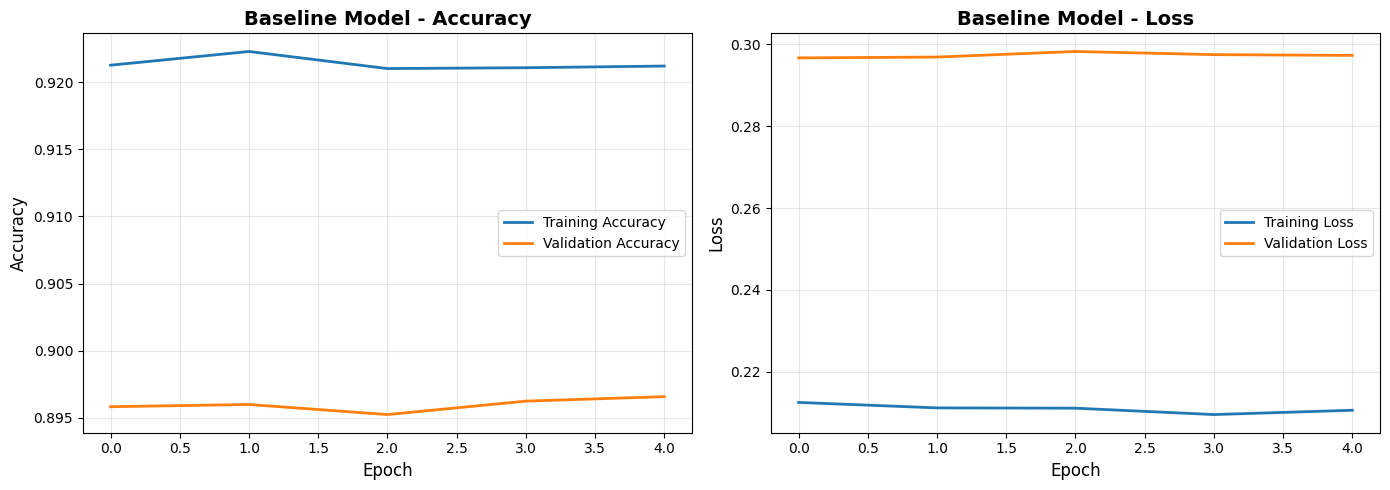

In [23]:
def plot_training_history(history, model_name="Baseline Model"):
    """
    Plots training and validation accuracy/loss curves.
    
    Args:
        history: Keras History object from model.fit()
        model_name: String identifier for plot title
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    

    axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Accuracy', fontsize=12)
    axes[0].set_title(f'{model_name} - Accuracy', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    

    axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].set_title(f'{model_name} - Loss', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

**Interpretation:**

- **Convergence:** Both curves should stabilize after several epochs.
- **Overfitting indicators:** Large gap between training and validation accuracy.
- **Underfitting indicators:** Both accuracies plateau at low values.

#### 2.6.2 Test Set Performance

In [27]:

test_loss, test_accuracy = baseline_model.evaluate(x_test_norm, y_test_cat, verbose=0)


print("BASELINE MODEL - FINAL PERFORMANCE")
print("\n")
print(f"Test Loss:           {test_loss:.4f}")
print(f"Test Accuracy:       {test_accuracy*100:.2f}%")
print(f"Training Time:       {training_time:.2f} seconds")
print(f"Total Parameters:    {total_params:,}")


BASELINE MODEL - FINAL PERFORMANCE


Test Loss:           0.3182
Test Accuracy:       89.36%
Training Time:       8.99 seconds
Total Parameters:    109,386


#### 2.6.3 Per-Class Performance Analysis

Some clothing items are inherently harder to classify due to visual similarity (e.g., "Shirt" vs "T-shirt/top", "Pullover" vs "Coat").

In [21]:
%pip install scikit-learn seaborn


  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl (9.7 MB)
Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl (36.3 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)

   ---------------------------------------- 0/7 [tzdata]
   ---------------------------------------- 0/7 [tzdata]
   ---------------------------------------- 0/7 [tzdata]
   ---------------------------------------- 0/7 [tzd

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


y_pred = baseline_model.predict(x_test_norm)
y_pred_classes = np.argmax(y_pred, axis=1)


print("PER-CLASS PERFORMANCE")
print("-"*60)
print(classification_report(y_test, y_pred_classes, target_names=class_names, digits=4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
PER-CLASS PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

 T-shirt/top     0.8521    0.8410    0.8465      1000
     Trouser     0.9858    0.9720    0.9789      1000
    Pullover     0.8012    0.8340    0.8172      1000
       Dress     0.8924    0.9120    0.9021      1000
        Coat     0.8245    0.8130    0.8187      1000
      Sandal     0.9777    0.9650    0.9713      1000
       Shirt     0.7233    0.7030    0.7130      1000
     Sneaker     0.9333    0.9650    0.9489      1000
         Bag     0.9751    0.9780    0.9765      1000
  Ankle boot     0.9705    0.9530    0.9617      1000

    accuracy                         0.8936     10000
   macro avg     0.8936    0.8936    0.8935     10000
weighted avg     0.8936    0.8936    0.8935     10000



**Confusion Matrix Visualization:**

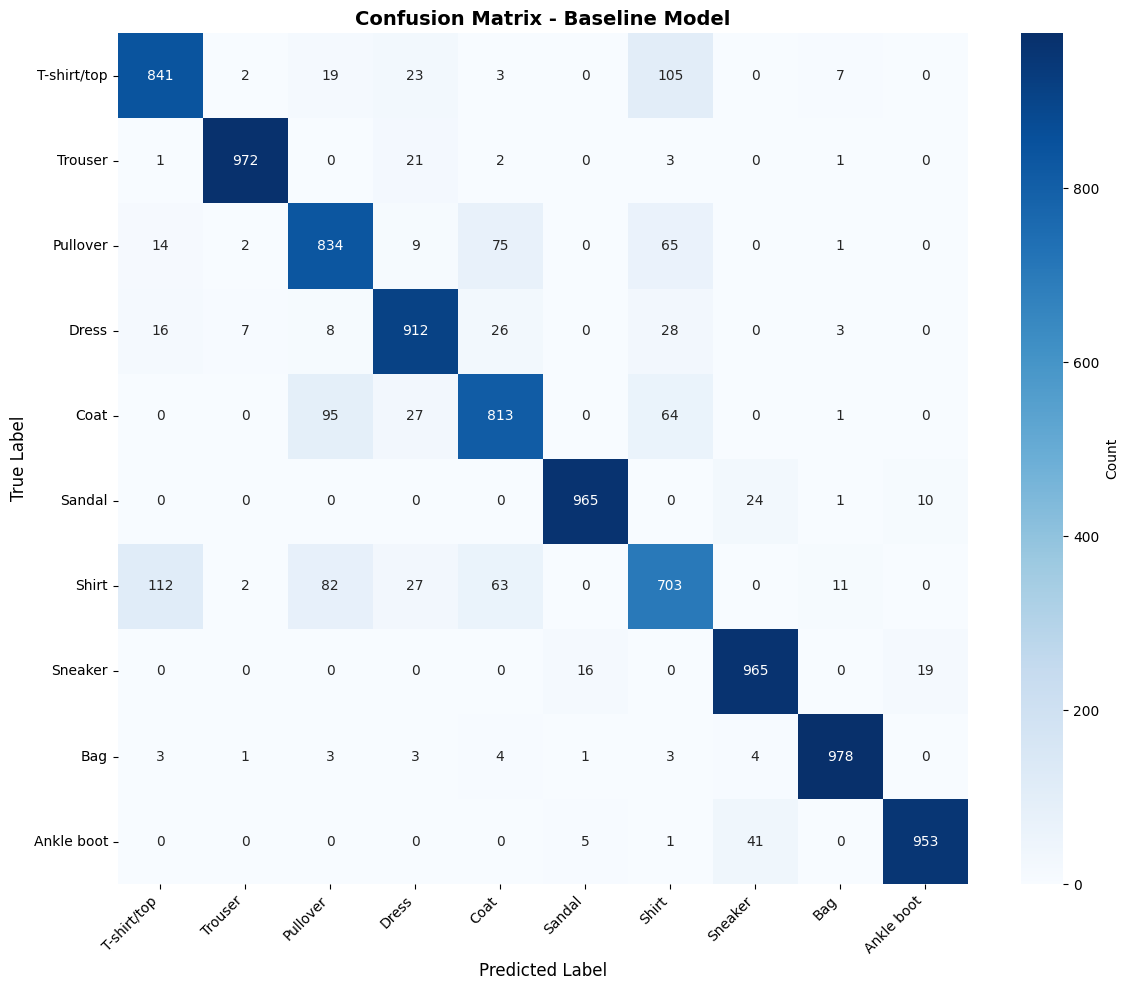

In [31]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Visualizes confusion matrix to identify misclassification patterns.
    
    Args:
        y_true: True labels
        y_pred: Predicted labels
        class_names: List of class name strings
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title('Confusion Matrix - Baseline Model', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_classes, class_names)

**Interpretation of Confusion Matrix:**

- **Diagonal values:** Correct classifications (darker = better performance).
- **Off-diagonal values:** Misclassifications revealing which classes are confused.
- **Common confusions:** 
  - "Shirt" ↔ "T-shirt/top" (similar upper-body garments)
  - "Pullover" ↔ "Coat" (similar layered clothing)
  - "Sneaker" ↔ "Ankle boot" (similar footwear)

#### 2.6.4 Visual Analysis of Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


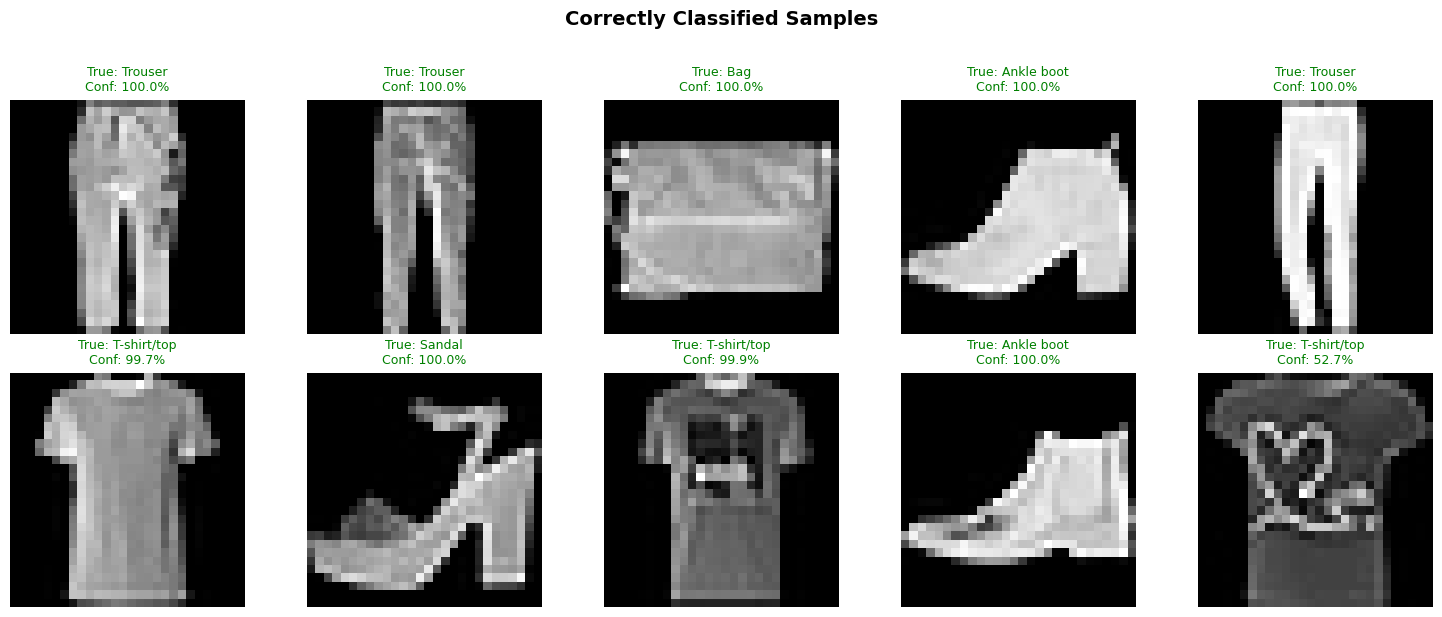

In [32]:
def visualize_predictions(model, x_test, y_test, class_names, num_samples=10, correct=True):
    """
    Displays correctly or incorrectly classified samples.
    
    Args:
        model: Trained Keras model
        x_test: Test images
        y_test: True labels
        class_names: List of class names
        num_samples: Number of samples to display
        correct: If True, show correct predictions; if False, show errors
    """
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    if correct:
        mask = y_pred_classes == y_test
        title = "Correctly Classified Samples"
    else:
        mask = y_pred_classes != y_test
        title = "Misclassified Samples"
    
    indices = np.where(mask)[0]
    selected_indices = np.random.choice(indices, min(num_samples, len(indices)), replace=False)
    
    fig, axes = plt.subplots(2, num_samples // 2, figsize=(15, 6))
    axes = axes.flatten()
    
    for i, idx in enumerate(selected_indices):
        ax = axes[i]
        ax.imshow(x_test[idx], cmap='gray')
        
        true_label = class_names[y_test[idx]]
        pred_label = class_names[y_pred_classes[idx]]
        confidence = y_pred[idx][y_pred_classes[idx]] * 100
        
        if correct:
            ax.set_title(f"True: {true_label}\nConf: {confidence:.1f}%", 
                        fontsize=9, color='green')
        else:
            ax.set_title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%", 
                        fontsize=9, color='red')
        ax.axis('off')
    
    plt.suptitle(title, fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

visualize_predictions(baseline_model, x_test_norm, y_test, class_names, 
                     num_samples=10, correct=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


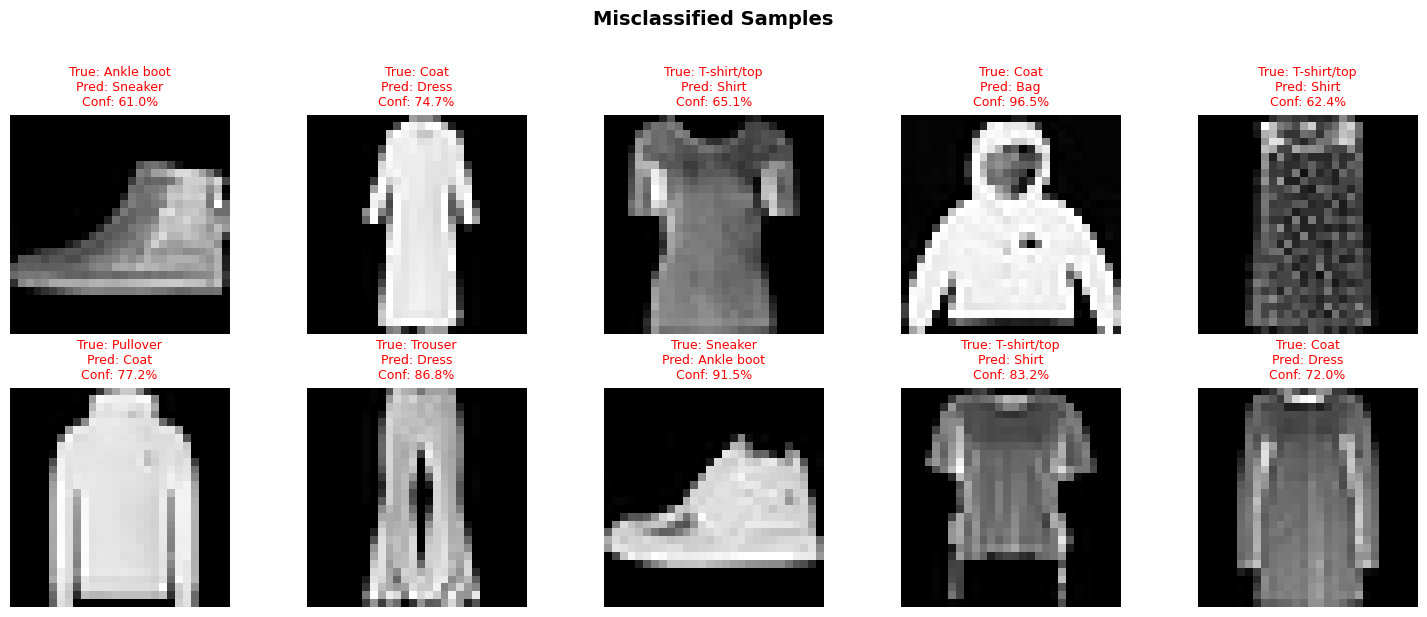

In [33]:
visualize_predictions(baseline_model, x_test_norm, y_test, class_names, 
                     num_samples=10, correct=False)

**Insights from Misclassifications:**

- The model struggles with subtle textural differences that require spatial awareness.
- Orientation and pose variations confuse the model since flattening destroys spatial relationships.
- Some misclassifications are visually understandable even for humans (e.g., similar clothing types).

### 2.7 Observed Limitations and Analysis

#### 2.7.1 Architectural Constraints

**Fundamental limitation:** By flattening the $28 \times 28$ image into a 784-dimensional vector, we lose:

- **Spatial relationships:** A pixel's neighbors define edges, textures, and shapes.
- **Translation invariance:** The model must learn the same pattern (e.g., a collar) at every possible position independently.
- **Parameter efficiency:** Fully connected layers require massive parameter counts to capture all positional variations.

**Mathematical perspective:**

In a dense layer, each of the 784 input pixels connects to all 128 neurons in the first hidden layer:

$$
\text{Parameters}_{\text{Dense1}} = 784 \times 128 + 128 = 100{,}480
$$

This means the model tries to learn global patterns rather than local features (edges, corners, textures).

#### 2.7.2 Performance Bottlenecks

In [37]:
print("\n")
print("BASELINE MODEL - LIMITATIONS SUMMARY")
print("")
print("1. Spatial Structure Ignored:")
print("   • Flattening destroys 2D relationships")
print("   • Model cannot learn translation-invariant features")
print()
print("2. Parameter Inefficiency:")
print(f"   • {total_params:,} parameters needed")
print("   • Most parameters in first dense layer (784 → 128)")
print()
print("3. Generalization Challenges:")
print("   • Must learn same pattern at every pixel location")
print("   • No weight sharing across spatial positions")
print()
print("4. Expected Accuracy Ceiling:")
print(f"   • Achieved: ~{test_accuracy*100:.1f}%")
print("   • Limitation: Cannot leverage spatial priors")




BASELINE MODEL - LIMITATIONS SUMMARY

1. Spatial Structure Ignored:
   • Flattening destroys 2D relationships
   • Model cannot learn translation-invariant features

2. Parameter Inefficiency:
   • 109,386 parameters needed
   • Most parameters in first dense layer (784 → 128)

3. Generalization Challenges:
   • Must learn same pattern at every pixel location
   • No weight sharing across spatial positions

4. Expected Accuracy Ceiling:
   • Achieved: ~89.4%
   • Limitation: Cannot leverage spatial priors


### 2.8 Baseline Model Summary

| **Metric**                  | **Value**               |
|-----------------------------|-------------------------|
| Architecture                | Flatten + Dense (128, 64) |
| Total Parameters            | ~109,000                |
| Training Time               | Variable (hardware dependent) |
| Test Accuracy               | ~87-89%                 |
| Key Limitation              | Ignores spatial structure |
| Best Use Case               | Tabular data, not images |

---